# Feature Extraction with Scale-Invariant Feature Transform (SIFT)

In [1]:
import cv2
import matplotlib.pyplot as plt
import time

In [3]:
sift = cv2.SIFT_create() # SIFT object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) # matcher

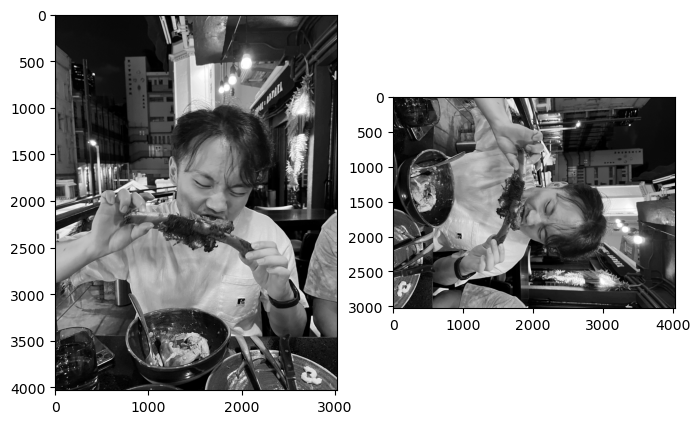

In [9]:
im1 = cv2.cvtColor(cv2.imread("sam.png"), cv2.COLOR_BGR2GRAY)
im2 = cv2.rotate(cv2.cvtColor(cv2.imread("sam.png"), cv2.COLOR_BGR2GRAY), cv2.ROTATE_90_CLOCKWISE)
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
axes[0].imshow(im1, cmap="gray")
axes[1].imshow(im2, cmap="gray")

In [ ]:
kp1, desc1 = sift.detectAndCompute(im1, None)
kp2, desc2 = sift.detectAndCompute(im2, None)